In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Pavel\.cache\kagglehub\datasets\arjunbhasin2013\ccdata\versions\1


In [4]:
df = pd.read_csv(path+'\\CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df3 = df

df3 = df3.dropna(subset=['CREDIT_LIMIT'])
df3 = df3.dropna(subset=['MINIMUM_PAYMENTS'])
df3 = df3.drop(['CUST_ID'], axis = 1)
df3['TENURE-6'] = df3['TENURE'] - 6
df3 = df3.drop(['TENURE'], axis = 1)

df3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE-6
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,6
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,6
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [7]:
from sklearn.preprocessing import StandardScaler

X = df3.to_numpy()

scaler = StandardScaler()
scaler_dataset = scaler.fit_transform(X)
X_scal = scaler_dataset
X_scal

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

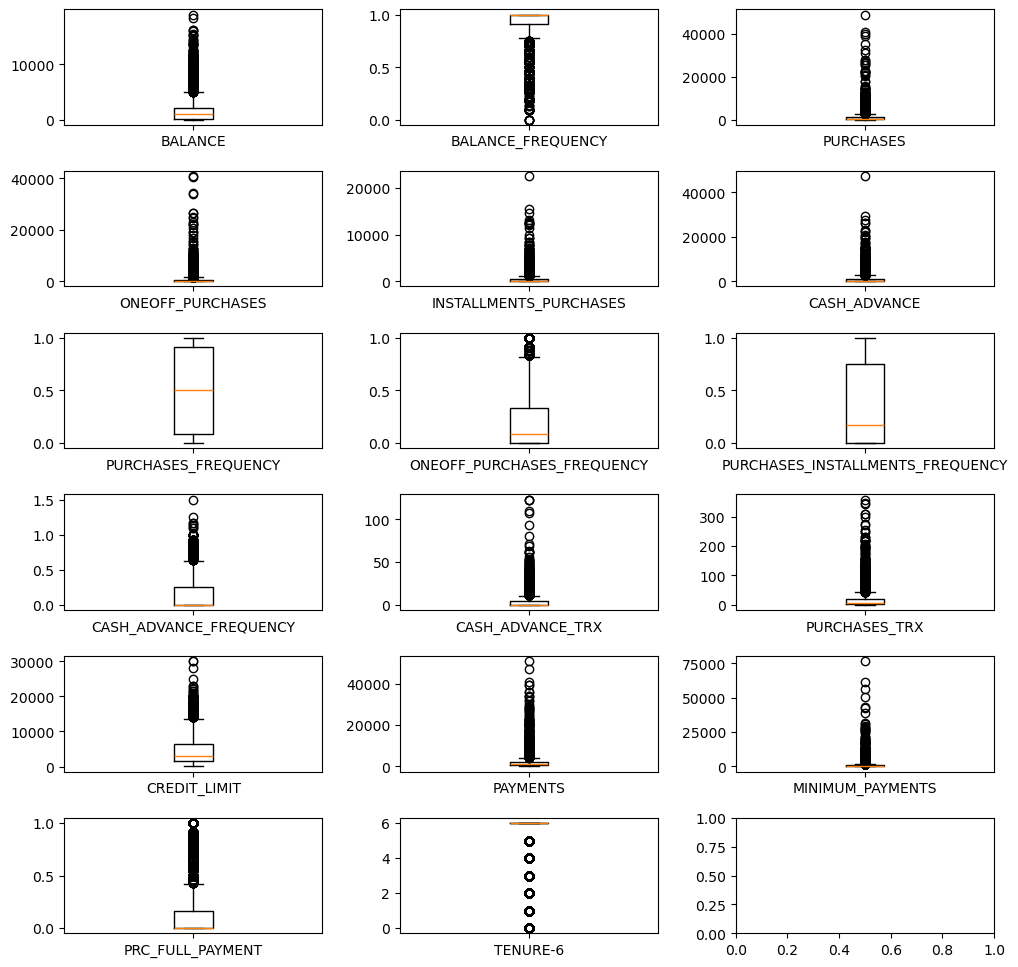

In [8]:
labels = df3.columns.to_list()

fig, ax = plt.subplots(6, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(17):
    ax[i // 3, i % 3].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

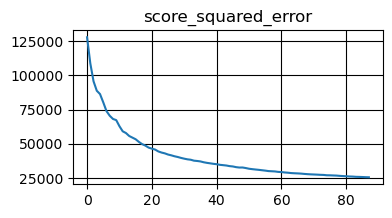

In [9]:
from sklearn.cluster import KMeans
#import warnings

#warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")

arr_score = []

for i in range(2, 90):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

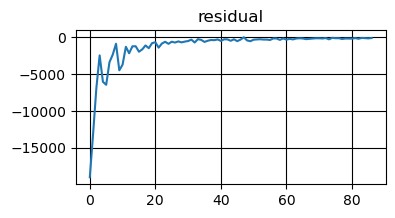

In [10]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i+1] - arr_score[i]
    residual_arr.append(res)

plt.figure(figsize = (4, 2))
plt.title('residual')
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

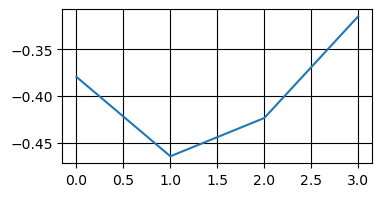

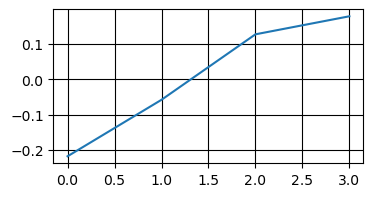

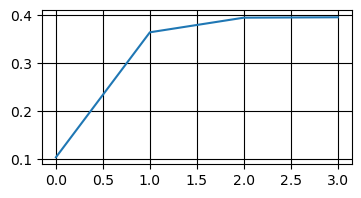

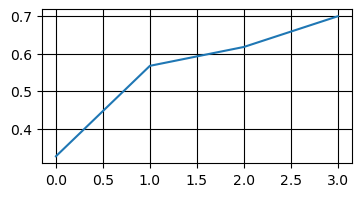

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

arr_score_dbskan = []

for i in range(1, 5):
    temp = []
    for j in range(1, 5):
        clustering = DBSCAN(eps = i, min_samples = j)
        score = silhouette_score(X_scal, clustering.fit_predict(X_scal))
        temp.append(score)
    arr_score_dbskan.append(temp)

for i in range(4):
    plt.figure(figsize = (4, 2))
    plt.plot(arr_score_dbskan[i], '-')
    plt.grid(True, color = 'k')

In [12]:
clustering = DBSCAN(eps = 3, min_samples = 4).fit(X_scal)
Counter(clustering.labels_)

Counter({np.int64(0): 8442, np.int64(-1): 185, np.int64(2): 5, np.int64(1): 4})

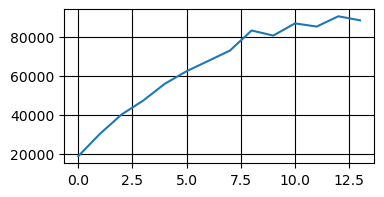

In [14]:
from sklearn.decomposition import PCA

arr_score = []

for i in range(2, 16):
    pca = PCA(n_components = i)
    X_transformed = pca.fit_transform(X_scal)
    kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = "auto", max_iter = 500).fit(X_transformed)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

In [ ]:
#вывод: уменьшение размерности датасета до 2 признаков дает наименьшую ошибку по алгоритму PCA

In [15]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)

arr_points = []

for i in range(5):
    temp = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            temp.append(X[j])
    arr_points.append(temp)

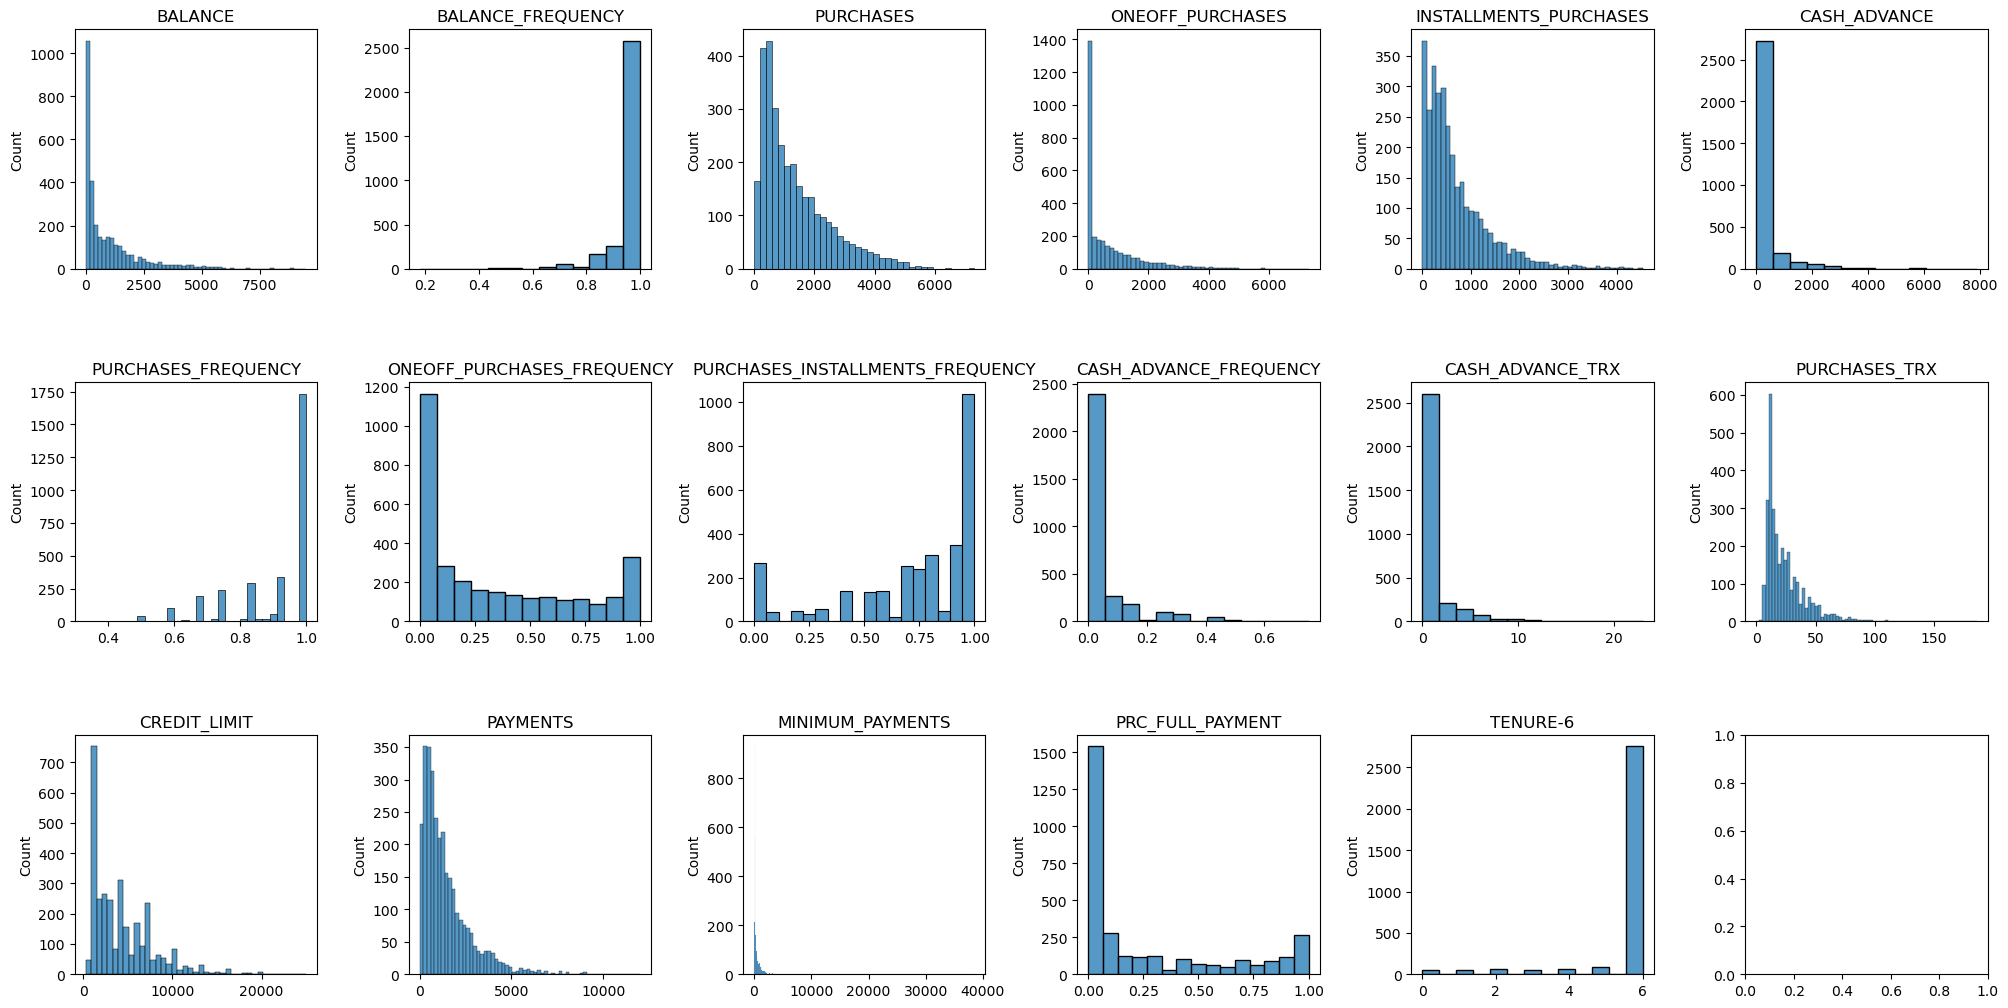

In [18]:
col_lst = df3.columns
arr = np.array(arr_points[0])

fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
axs = axs.flatten()

for i in range(arr.shape[1]):
    seaborn.histplot(arr[:, i], ax=axs[i])
    axs[i].set_title(col_lst[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [22]:
arr.shape[1]

17

In [141]:
for i in range(5):
    arr = np.array(arr_points[i])
    print(f"---кластер №{i}---")
    for j in range(len(labels)):
        arr_frec = Counter(arr[:, j])
        most_common_items = arr_frec.most_common()
        if len(most_common_items) == 2:
            element1, count1 = most_common_items[0]
            element2, count2 = most_common_items[1]
            ratio = count1 / count2
            if ratio >= 2:
                print(f"основной признак {labels[j]}: параметр {element1}")
        elif len(most_common_items) == 1:
            element1, count1 = most_common_items[0] 
            print(f"основной признак {labels[j]}: параметр {element1}")
        elif len(most_common_items) >= 2:
            arr_el = []
            arr_count = []
            for k in range(len(most_common_items)):
                element0, count0 = most_common_items[k]
                arr_el.append(round(float(element0), 3))
                arr_count.append(count0)
            k_max = 2 + round(0.001 * len(most_common_items)) # после доработки алгорима поставить коэффициенты 1 и 0.25
            arr_el_final = []
            for k in range(k_max):
                sum_left = 0
                sum_right = 0
                for t in range(k + 1):
                    sum_left += arr_count[t]
                for t in range(k + 1, k_max + 1):
                    sum_right += arr_count[t]
                ratio = sum_left / sum_right
                arr_el_final.append(arr_el[k])
                if ratio > 2:
                    print(f"основной признак {labels[j]}: параметры {arr_el_final}")
                    break

---кластер №0---
основной признак BALANCE: параметры [2495.149, 1809.829, 1823.653, 1293.125, 1516.929]
основной признак BALANCE_FREQUENCY: параметры [1.0]
основной признак PURCHASES: параметры [398.64, 689.4, 360.0, 540.0, 450.0]
основной признак ONEOFF_PURCHASES: параметры [0.0]
основной признак INSTALLMENTS_PURCHASES: параметры [0.0]
основной признак CASH_ADVANCE: параметры [0.0]
основной признак PURCHASES_FREQUENCY: параметры [1.0]
основной признак ONEOFF_PURCHASES_FREQUENCY: параметры [0.0, 1.0]
основной признак PURCHASES_INSTALLMENTS_FREQUENCY: параметры [1.0, 0.917]
основной признак CASH_ADVANCE_FREQUENCY: параметры [0.0]
основной признак CASH_ADVANCE_TRX: параметры [0.0]
основной признак PURCHASES_TRX: параметры [12.0, 11.0]
основной признак CREDIT_LIMIT: параметры [1000.0, 1500.0]
основной признак PAYMENTS: параметры [622.067, 1400.058, 679.065, 1083.301, 608.264]
основной признак MINIMUM_PAYMENTS: параметры [627.285, 2407.246, 532.034, 2172.698, 490.207]
основной признак PRC_